In [1]:
import re
import os
import nltk
import joblib
import requests
import numpy as np
from bs4 import BeautifulSoup
import urllib.request as urllib
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from flask import Flask,render_template,request
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://www.flipkart.com/adsun-80-cm-32-inch-hd-ready-led-smart-tv/p/itmffmnvy7khsuzx?pid=TVSFFMNVUVNS3SHF&lid=LSTTVSFFMNVUVNS3SHFVWHTAU&marketplace=FLIPKART&q=tv&store=ckf%2Fczl&srno=s_1_1&otracker=AS_Query_TrendingAutoSuggest_8_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_8_0_na_na_na&iid=en_W44OZna%2FDSyP%2BI7j%2FPe8uZgGMVbEs5KG41%2F59VfraNs%2FdaLhhfRpvWpbfLLS1rdpi5LVVHWr%2BEbduqByQ4lodA%3D%3D&ssid=jk94u00e4w0000001649400669718&qH=c9a1fdac6e082dd8'

In [3]:
nreviews = int(input("Enter the no of reviews to filter:"))

Enter the no of reviews to filter:55


In [5]:
with urllib.urlopen(url) as u:
  page = u.read()
  page_html = BeautifulSoup(page, "html.parser")

In [6]:
clean_reviews = []
org_reviews = []
customernames = []
commentheads = []
ratings = []

In [7]:
proname = page_html.find_all('span', {'class': 'B_NuCI'})[0].get_text() 
print(proname)
price = page_html.find_all('div', {'class': '_30jeq3 _16Jk6d'})[0].get_text()
print(price)
#for i in range(0,(nreviews)):
#  print(reviews[i])

Adsun 80 cm (32 inch) HD Ready LED Smart TV  (A-3200S)
₹9,499


In [8]:
all_reviews_url = page_html.find_all('div', {'class': '_2c2kV-'})[0]
print(all_reviews_url)
all_reviews_url = all_reviews_url.find_all('a')[-1]
print(all_reviews_url)
all_reviews_url = 'https://www.flipkart.com'+all_reviews_url.get('href')
print(all_reviews_url)
url2 = all_reviews_url+'&page=1'
url2

<div class="row _3AjFsn _2c2kV-"><div class="_2e3Uck"><div class="row"><div class="col-4-12"><div class="col"><div class="row"><div class="col-12-12 _1azcI6"><div class="_2d4LTz">3.8</div><div class="_2yxeXv">★</div></div></div><div class="row _2afbiS"><div class="col-12-12"><span>3,942 Ratings &amp;</span></div></div><div class="row _2afbiS"><div class="col-12-12"><span>531 Reviews</span></div></div></div></div><div class="col-8-12 _3qpj74 _31DkEZ"><div class="_13sFCC miQW6D _2m9Pwo"><ul class="_2jr1F_"><li class="_28Xb_u"><div class="omG9iE"><span class="_26f_zl">5</span><span class="_2xBWPJ">★</span></div></li><li class="_28Xb_u"><div class="omG9iE"><span class="_26f_zl">4</span><span class="_2xBWPJ">★</span></div></li><li class="_28Xb_u"><div class="omG9iE"><span class="_26f_zl">3</span><span class="_2xBWPJ">★</span></div></li><li class="_28Xb_u"><div class="omG9iE"><span class="_26f_zl">2</span><span class="_2xBWPJ">★</span></div></li><li class="_28Xb_u"><div class="omG9iE"><span 

'https://www.flipkart.com/adsun-80-cm-32-inch-hd-ready-led-smart-tv/product-reviews/itmffmnvy7khsuzx?pid=TVSFFMNVUVNS3SHF&lid=LSTTVSFFMNVUVNS3SHFVWHTAU&aid=170b5df1-a846-41be-90aa-876723a549bd&mid=FLIPKART&fid=7677c855-fe8c-4084-b16e-3d718152dcf8.TVSFFMNVUVNS3SHF&an=Delivery & Installation&cat=Television&vert=Television&page=1'

In [9]:
def clean(x):
    x = re.sub(r'[^a-zA-Z ]', ' ', x) # replace evrything thats not an alphabet with a space
    x = re.sub(r'\s+', ' ', x) #replace multiple spaces with one space
    x = re.sub(r'READ MORE', '', x) # remove READ MORE
    x = x.lower()
    x = x.split()
    y = []
    for i in x:
        if len(i) >= 3:
            if i == 'osm':
                y.append('awesome')
            elif i == 'nyc':
                y.append('nice')
            elif i == 'thanku':
                y.append('thanks')
            elif i == 'superb':
                y.append('super')
            else:
                y.append(i)
    return ' '.join(y)

In [10]:
reviews = page_html.find_all('div', {'class': 't-ZTKy'})
print(reviews)

[<div class="t-ZTKy"><div><div class="">Nice tv picture quality good &amp; sound is to good screen minoring is not available</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div>, <div class="t-ZTKy"><div><div class="">that is very good TV this led quality is very good picture, sound and all things is good but remote is not better. so i suggest that try led tv because it's my country brand. and all things is good</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div>, <div class="t-ZTKy"><div><div class="">Nice product in such a low price range, good picture quality, good sound quality. Overall a good to buy in such a price range.</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div>, <div class="t-ZTKy"><div><div class="">Very fast dilivery, was suppose get one 28 th arrived on 26 , giving one star less I got confirm message of installation for tv but they never arrived and cancelled from there end . Other wise picture quality , sound all go

In [11]:
commentheads_ = page_html.find_all('p',{'class':'_2-N8zT'})
commentheads_

[<p class="_2-N8zT">Terrific purchase</p>,
 <p class="_2-N8zT">Classy product</p>,
 <p class="_2-N8zT">Worth every penny</p>,
 <p class="_2-N8zT">Worth the money</p>,
 <p class="_2-N8zT">Just wow!</p>,
 <p class="_2-N8zT">Great product</p>,
 <p class="_2-N8zT">Awesome</p>,
 <p class="_2-N8zT">Worth the money</p>,
 <p class="_2-N8zT">Mind-blowing purchase</p>,
 <p class="_2-N8zT">Fabulous!</p>]

In [12]:
customernames_ = page_html.find_all('p',{'class':'_2sc7ZR _2V5EHH'})
customernames_

[<p class="_2sc7ZR _2V5EHH">Lokesh GIRHARE</p>,
 <p class="_2sc7ZR _2V5EHH">Harsh Rajput</p>,
 <p class="_2sc7ZR _2V5EHH">Gaurav Vig</p>,
 <p class="_2sc7ZR _2V5EHH">Darshna Thakar</p>,
 <p class="_2sc7ZR _2V5EHH">Flipkart Customer</p>,
 <p class="_2sc7ZR _2V5EHH">Flipkart Customer</p>,
 <p class="_2sc7ZR _2V5EHH">Thakur Anand kishor  Chauhan </p>,
 <p class="_2sc7ZR _2V5EHH">Soumick Seth</p>,
 <p class="_2sc7ZR _2V5EHH">Manpreet Singh</p>,
 <p class="_2sc7ZR _2V5EHH">Rohit Pandit</p>]

In [13]:
ratings_ = page_html.find_all('div',{'class':['_3LWZlK _1BLPMq','_3LWZlK _32lA32 _1BLPMq','_3LWZlK _1rdVr6 _1BLPMq']})
ratings_

[<div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1BLPMq">4</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1BLPMq">4</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1BLPMq">5</div>]

In [14]:
for review in reviews:
  x = review.get_text()
  org_reviews.append(re.sub(r'READ MORE', '', x))
  clean_reviews.append(clean(x))
clean_reviews

['nice picture quality good sound good screen minoring not available',
 'that very good this led quality very good picture sound and all things good but remote not better suggest that try led because country brand and all things good',
 'nice product such low price range good picture quality good sound quality overall good buy such price range',
 'very fast dilivery was suppose get one arrived giving one star less got confirm message installation for but they never arrived and cancelled from there end other wise picture quality sound all good with good price',
 'good worth buying good picture quality and affordable price for',
 'this product really awesome the connectivity and response the great the picture quality super was not expecting much this price earlier but this masterpiece beating big giants the picture starthe volume starresponse stareasy navigate starservice excellent installation the team would recommend purchase this one you won get any ption beat this engineering such lo

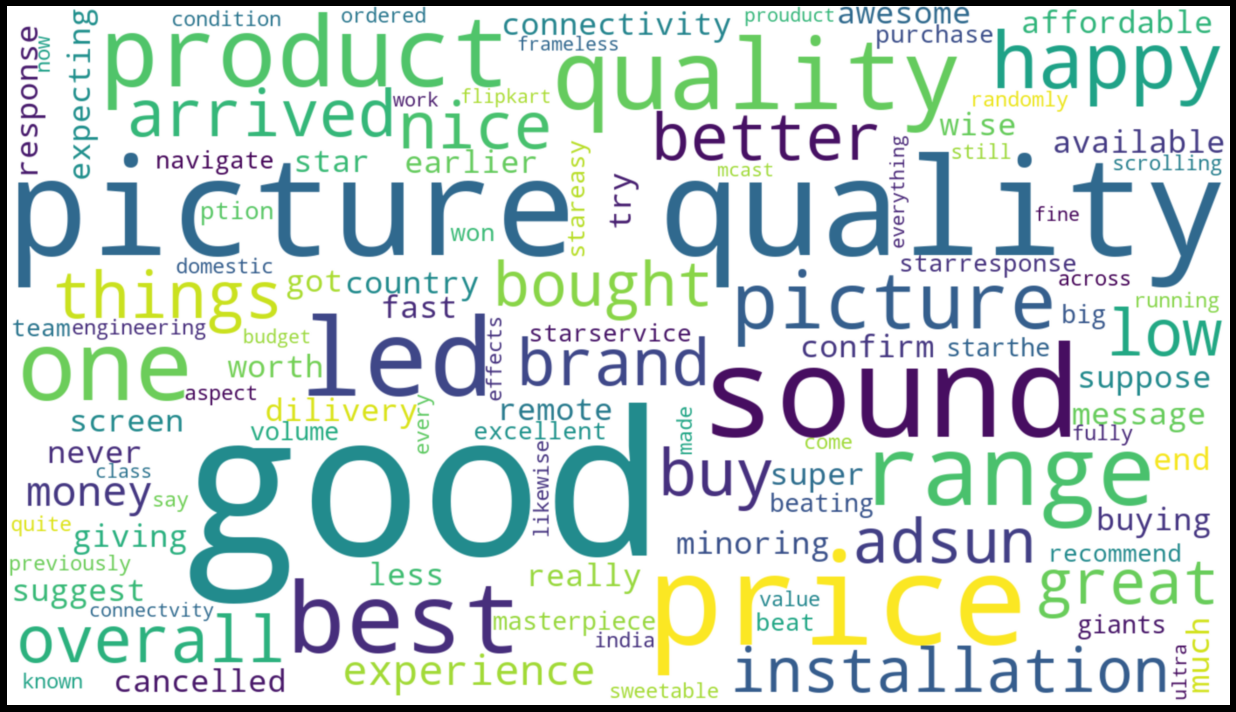

In [15]:
for_wc = ' '.join(clean_reviews)
wcstops = set(STOPWORDS)
wc = WordCloud(width=1400,height=800,stopwords=wcstops,background_color='white').generate(for_wc)
plt.figure(figsize=(20,10), facecolor='k', edgecolor='k')
plt.imshow(wc, interpolation='bicubic') 
plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
print(reviews[0])
print(commentheads_[0])
print(clean_reviews[0])

<div class="t-ZTKy"><div><div class="">Nice tv picture quality good &amp; sound is to good screen minoring is not available</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div>
<p class="_2-N8zT">Terrific purchase</p>
nice picture quality good sound good screen minoring not available


In [17]:
comhead=[]
for ch in commentheads_:
  x = ch.get_text()
  x = re.sub(r'[^a-zA-Z ]', ' ', x) # replace evrything thats not an alphabet with a space
  comhead.append(clean(x))
comhead

['terrific purchase',
 'classy product',
 'worth every penny',
 'worth the money',
 'just wow',
 'great product',
 'awesome',
 'worth the money',
 'mind blowing purchase',
 'fabulous']

In [18]:
print(nreviews)
import pandas as pd
cols = ['reviews', 'commentheads', 'clean_reviews','ratings']
lst = []
for i in range(0,len(clean_reviews)):
  lst.append([reviews[i],comhead[i],clean_reviews[i],ratings_[i]])
df = pd.DataFrame(lst, columns=cols)
df

55


,reviews,commentheads,clean_reviews,ratings
0,[[[Nice tv picture quality good & sound is to ...,terrific purchase,nice picture quality good sound good screen mi...,"[5, []]"
1,[[[that is very good TV this led quality is ve...,classy product,that very good this led quality very good pict...,"[5, []]"
2,"[[[Nice product in such a low price range, goo...",worth every penny,nice product such low price range good picture...,"[5, []]"
3,"[[[Very fast dilivery, was suppose get one 28 ...",worth the money,very fast dilivery was suppose get one arrived...,"[4, []]"
4,[[[Good tv worth buying... Good picture qualit...,just wow,good worth buying good picture quality and aff...,"[5, []]"
5,[[[This product is really Awesome. The connect...,great product,this product really awesome the connectivity a...,"[5, []]"
6,[[[It's very good TV picture quality and sound...,awesome,very good picture quality and sound quality ve...,"[5, []]"
7,"[[[Not known about this brand previously, come...",worth the money,not known about this brand previously come acr...,"[4, []]"
8,[[[this is the best led in every aspect likewi...,mind blowing purchase,this the best led every aspect likewise pictur...,"[5, []]"
9,[[[Best in Budget. Great Picture quality. Fram...,fabulous,best budget great picture quality frameless be...,"[5, []]"


In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df2["Positive1"] = [sentiments.polarity_scores(i)["pos"] for i in df["clean_reviews"]]
df2["Negative1"] = [sentiments.polarity_scores(i)["neg"] for i in df["clean_reviews"]]
df2["Neutral1"] = [sentiments.polarity_scores(i)["neu"] for i in df["clean_reviews"]]
df2 = df2[[ "Positive1", "Negative1", "Neutral1"]]
df2

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


AttributeError: 'float' object has no attribute 'encode'

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive2"] = [sentiments.polarity_scores(i)["pos"] for i in df["commentheads"]]
df["Negative2"] = [sentiments.polarity_scores(i)["neg"] for i in df["commentheads"]]
df["Neutral2"] = [sentiments.polarity_scores(i)["neu"] for i in df["commentheads"]]
df = df.append(df[["commentheads", "Positive2", "Negative2", "Neutral2"]])
df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,commentheads,clean_reviews,ratings,Positive2,Negative2,Neutral2
0,[[[Nice tv picture quality good & sound is to ...,terrific purchase,nice picture quality good sound good screen mi...,"[5, []]",0.756,0.0,0.244
1,[[[that is very good TV this led quality is ve...,classy product,that very good this led quality very good pict...,"[5, []]",0.744,0.0,0.256
2,"[[[Nice product in such a low price range, goo...",worth every penny,nice product such low price range good picture...,"[5, []]",0.487,0.0,0.513
3,"[[[Very fast dilivery, was suppose get one 28 ...",worth the money,very fast dilivery was suppose get one arrived...,"[4, []]",0.487,0.0,0.513
4,[[[Good tv worth buying... Good picture qualit...,just wow,good worth buying good picture quality and aff...,"[5, []]",0.792,0.0,0.208
5,[[[This product is really Awesome. The connect...,great product,this product really awesome the connectivity a...,"[5, []]",0.804,0.0,0.196
6,[[[It's very good TV picture quality and sound...,awesome,very good picture quality and sound quality ve...,"[5, []]",1.000,0.0,0.000
7,"[[[Not known about this brand previously, come...",worth the money,not known about this brand previously come acr...,"[4, []]",0.487,0.0,0.513
8,[[[this is the best led in every aspect likewi...,mind blowing purchase,this the best led every aspect likewise pictur...,"[5, []]",0.000,0.0,1.000
9,[[[Best in Budget. Great Picture quality. Fram...,fabulous,best budget great picture quality frameless be...,"[5, []]",1.000,0.0,0.000


In [ ]:
df['analysis']=''
def sentiment_score(a, b, c,):
    if ((a>b) and (a>c)):
        result="Positive "
    elif ((b>a) and (b>c)):
        result="Negative "
    else:
        result ="Neutral "
    return result
value=[]
val=""
for i in range(0,len(clean_reviews)):
    x =(df["Positive"][i])
    y =(df["Negative"][i])
    z =(df["Neutral"][i])
    df['analysis'][i]=sentiment_score(x, y, z)

In [ ]:
df

In [ ]:
tb_counts = df['analysis'].value_counts()
tb_counts

In [ ]:
######

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000)

In [ ]:
X = cv.fit_transform(df['clean_reviews']).toarray()
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm= confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

In [ ]:
X_fresh = cv.transform(df['clean_reviews']).toarray()
X_fresh.shape

In [ ]:
y_pred = classifier.predict(X_fresh)
y_pred

In [ ]:
df['predicted_label'] = y_pred.tolist()
df.head(10)

In [ ]:
df['analysis_two']=''
def sentiment_score(a, b, c,):
    if ((a>b) and (a>c)):
        result="Positive "
    elif ((b>a) and (b>c)):
        result="Negative "
    else:
        result ="Neutral "
    return result
value=[]
val=""
for i in range(0,len(clean_reviews)):
    x =(df["Positive"][i])
    y =(df["Negative"][i])
    z =(df["Neutral"][i])
    df['analysis_two'][i]=sentiment_score(x, y, z)
df